In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from numba import jit, f8 
import h5py
import argparse
from collections import namedtuple
import seaborn as sns
sns.set()
plt.rcParams['axes.grid'] = False

#load other written functions
from ADI_BPM_2d import onetoteoD,get_coords, adi_propagate
from bpm_initial_conditions import GaussianBeam_BPM_FFT2D,GaussianBeam_BPM_FFT,GaussianBeam1DRotated


lamb = 800e-9
beamwaist = 5e-6
LX = 5e-5
LY = LX
LZ = .01
NX = 100
NY = NX
NZ = 100
dz = LZ/NZ
dx = LX/NX
dy = LY/NY

k0,kx,zR,stps,cx,A0 = GaussianBeam_BPM_FFT2D(lamb,beamwaist,LX,LZ,NX,dz ,0)

cx,cy =  get_coords(NX,NY,LX,LY)
cx = np.real(cx)
cy = np.real(cy)

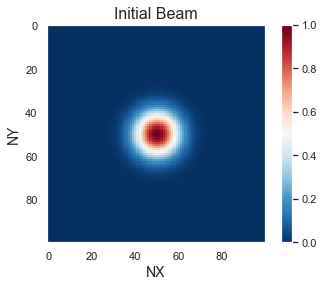

In [69]:
fig, ax = plt.subplots(1,1)
img= plt.imshow(np.real(A0),Cmap="RdBu_r")
plt.title("Initial Beam",fontsize = 16)
fig.colorbar(img)
plt.grid(False)
plt.xlabel("NX",fontsize = 14)
plt.ylabel("NY",fontsize = 14)
plt.show()


In [70]:
Af=GaussianBeam1DRotated( cx, LZ , beamwaist, k0,0)

In [71]:
As= adi_propagate(LX, NX, LY,NY,LZ, NZ,k0,A0)

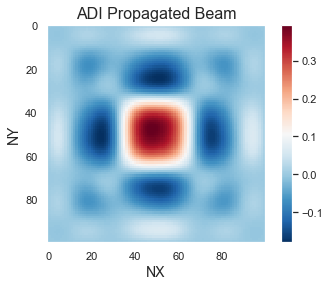

In [72]:
fig, ax = plt.subplots(1,1)
img= plt.imshow(np.real(As),Cmap="RdBu_r")
fig.colorbar(img)
plt.grid(False)
plt.title("ADI Propagated Beam",fontsize = 16)
plt.xlabel("NX",fontsize = 14)
plt.ylabel("NY",fontsize = 14)
plt.show()

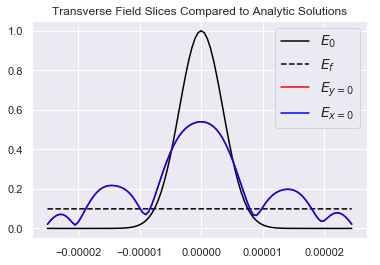

In [73]:
plt.plot(cx,np.abs(A0[int(NX/2),:]),c='black',label = "$E_0$")
plt.grid(True)
plt.plot(cx,np.abs(Af),ls='--',c='black',label = "$E_f$")
plt.plot(cx,np.abs(As[int(NX/2),:]),c='red',label = "$E_{y=0}$")
plt.plot(cx,np.abs(As[:,int(NX/2)]),c='blue',label = "$E_{x=0}$")
#plt.plot(cx,np.imag(As[int(NX/2),:]),ls = '--',c='red')
#plt.plot(cx,np.imag(As[:,int(NX/2)]),ls ='--',c='blue')
plt.legend(frameon=True,fontsize = 14)
plt.title("Transverse Field Slices Compared to Analytic Solutions")
plt.show()